In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# URLs for the JSON files to be cleaned

url_polls = r'https://projects.fivethirtyeight.com/trump-approval-ratings/polls.json'

url_average = r'https://projects.fivethirtyeight.com/trump-approval-ratings/approval.json'

In [3]:
#import the 'Graph values' JSON to a DataFrame
all_graph_df = pd.read_json(url_average)


graph_estimates = all_graph_df[all_graph_df['future']==False].reset_index(drop=True)
graph_estimates.to_csv('../data/graph_estimates.csv', sep=';', decimal=',')

In [4]:
#import the 'Polls' JSON to a DataFrame
polls_df = pd.read_json(url_polls)
polls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8442 entries, 0 to 8441
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             8442 non-null   int64         
 1   subgroup       8442 non-null   object        
 2   sampleSize     8442 non-null   int64         
 3   population     8442 non-null   object        
 4   weight         8442 non-null   float64       
 5   grade          8442 non-null   object        
 6   multiversions  8442 non-null   bool          
 7   url            8442 non-null   object        
 8   created_at     8442 non-null   datetime64[ns]
 9   startDate      8442 non-null   object        
 10  endDate        8442 non-null   object        
 11  pollster       8442 non-null   object        
 12  tracking       8442 non-null   object        
 13  answers        8442 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(9)
memory us

In [5]:
# the column "answers" has each value stored as a list of 2 dictionaries, with 3 keys each. 
# This line of code transforms this column
# into 4 different columns with the data needed
cleaned_polls = pd.concat([polls_df, polls_df['answers'].explode().apply(pd.Series).pivot(columns = 'choice')], axis =1).drop(columns='answers')
cleaned_polls.rename(columns = {('pct', 'Approve') : 'approve_pct',
                                ('pct', 'Disapprove') : 'disapprove_pct',
                                ('adjusted', 'Approve') : 'approve_adjusted',
                                ('adjusted', 'Disapprove') : 'disapprove_adjusted',
                               }, inplace=True)
cleaned_polls [['approve_pct','disapprove_pct', 'approve_adjusted','disapprove_adjusted']] = cleaned_polls [['approve_pct','disapprove_pct', 'approve_adjusted','disapprove_adjusted']].astype(float)
cleaned_polls.to_csv('../data/cleaned_polls.csv', sep=';', decimal=',')

In [6]:
polls_toplot = cleaned_polls [['id', 'subgroup', 'weight', 'created_at', 'approve_adjusted', 'disapprove_adjusted']]

polls_toplot = polls_toplot[polls_toplot['subgroup'] == 'All polls']

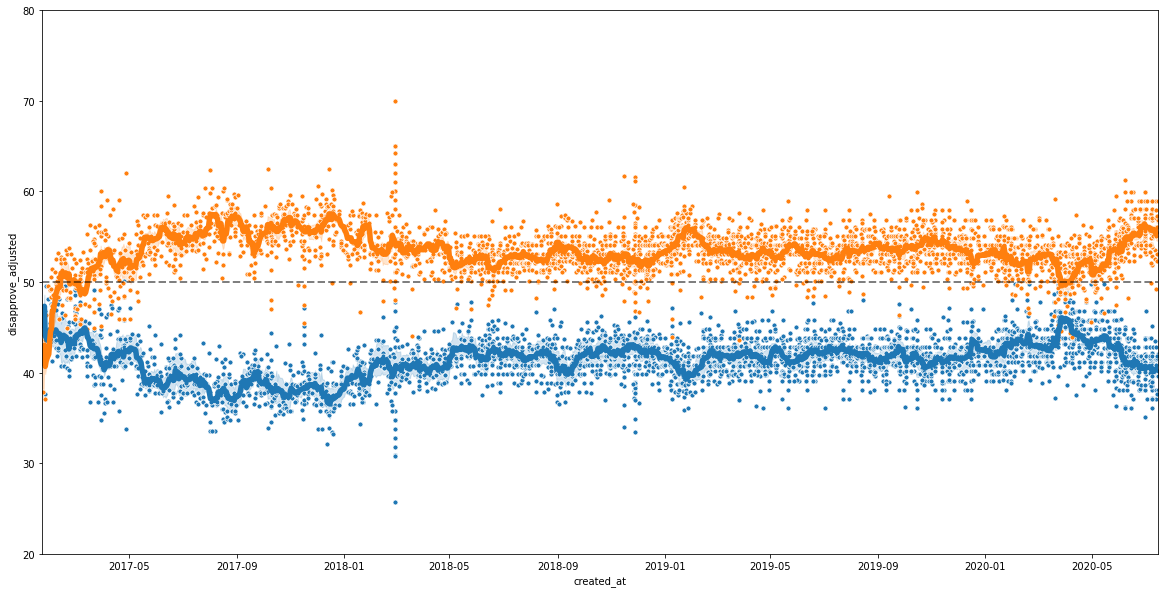

In [7]:
# test if data is correct by plotting in Seaborn
fig, ax = plt.subplots(figsize = (20,10))

ax = sns.lineplot(x='date',y='approve_estimate' ,data = graph_estimates, linewidth = 5.5)
ax = sns.lineplot(x='date',y='disapprove_estimate' ,data = graph_estimates, linewidth = 5.5)
ax = sns.scatterplot(x="created_at", y='approve_adjusted', data=polls_toplot, s = 25)
ax = sns.scatterplot(x="created_at", y='disapprove_adjusted', data=polls_toplot, s = 25)
ax.set_xlim([datetime.date(2017, 1, 22), datetime.date.today()])
ax.set_ylim([20, 80])
ax.axhline(y = 50, color='black', ls = '--', linewidth=2, alpha=.5)